# Summary of performance : animals vs cells

In this notebook i will show the results of three models with the same architecture trained with different images and class proportion.

- not_lung vs lung ~4:1 
- dog vs cat ~4:1 (same number of images as cells)
- cat vs dog 1:1


To evaluate the models I'm showing: 
- loss during training 
- accuracy during training
- ROC Curve
- Precision-Recall Curve

In [10]:
from keras.models import load_model
from IPython.display import Image 
from CMP_functions.preprocessing import *
import pandas as pd
import numpy as np

In [11]:
info_df = pd.read_csv('../data/images_info_table.csv')
info_df['lung'] = np.where(info_df['tissue']=='Lung', 'lung', 'not_lung')

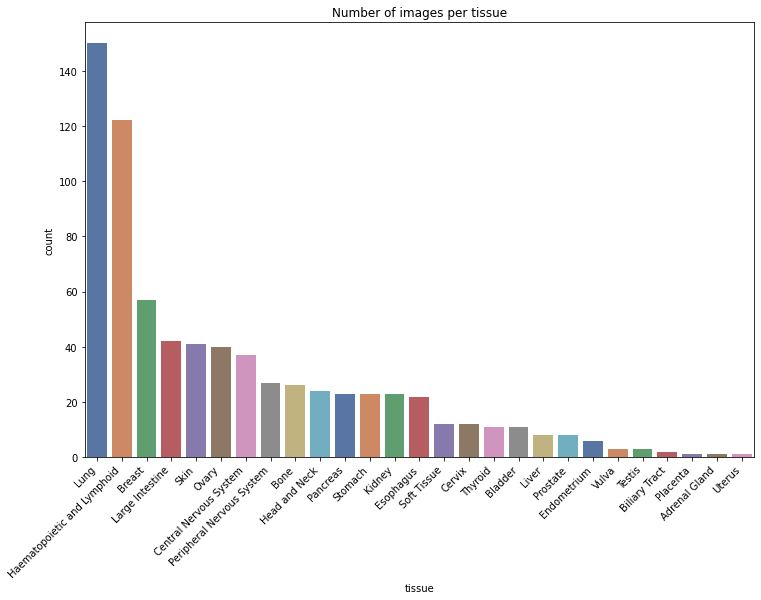

In [12]:
plot_ft_many(info_df, 'tissue')

lung images = 150
NOT lung images = 586
negative-positive ratio = 3.9066666666666667


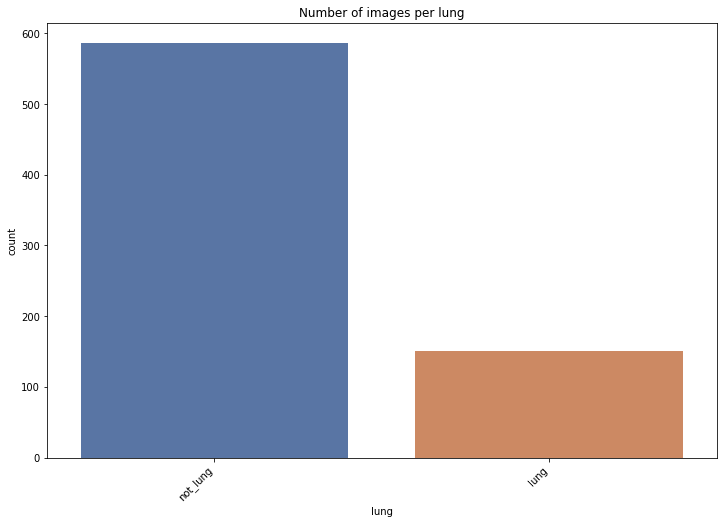

In [13]:
plot_ft_many(info_df, 'lung')
print(f'lung images =', len(info_df[info_df.lung=='lung']))
print(f'NOT lung images =',len(info_df[info_df.lung=='not_lung']))
print(f'negative-positive ratio =', len(info_df[info_df.lung=='not_lung'])/len(info_df[info_df.lung=='lung']))

## Model architecture

In [14]:
model_lung = load_model('Lung_vs_not_lung_model.h5')
model_lung.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

## Lung model

![title](Lung_vs_not_lung_trainig_result.png)

![title](lung_vs_not_lung_predictions_result.png)

## Dog Cat model (same size and proportion as lung)

![title](dog_vs_cat_unbalaced_trainig_result.png)

![title](dog_vs_cat_unbalaced_predictions_result.png)

## Dog Cat model (1:1, 1000 train and 400 validation)

![title](dog_vs_cat_balaced_trainig_result.png)

![title](dog_vs_cat_balaced_predictions_result.png)